In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('./sample_data/mnist_train_small.csv',header=None)
data = np.array(data)

In [2]:
y_train = data[:,1:]
x_train = data[:,0]
y_train = y_train.reshape(-1,28,28)

5

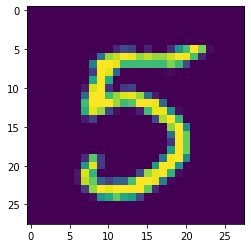

In [3]:
import matplotlib.pyplot as plt
plt.imshow(y_train[1,:,:])
x_train[1]

In [5]:
import tensorflow.keras as keras

x_train = keras.utils.to_categorical(x_train)
y_train = y_train/255

In [7]:
from keras.models import Sequential
from keras import layers
from keras import optimizers

model = Sequential()
model.add(layers.Dense(units=3136, input_shape=(10,), activation='relu'))
model.add(layers.Reshape((7,7,64)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same',activation='relu'))
model.add(layers.Conv2D(filters=1, kernel_size=3, padding='same', activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [8]:
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3136)              34496     
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        9232      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 1)        

In [9]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
219/219 [==============================] - 57s 188ms/step - loss: 0.0750 - accuracy: 0.7945 - val_loss: 0.0538 - val_accuracy: 0.7912
Epoch 2/10
219/219 [==============================] - 41s 185ms/step - loss: 0.0540 - accuracy: 0.7920 - val_loss: 0.0546 - val_accuracy: 0.8011
Epoch 3/10
219/219 [==============================] - 40s 185ms/step - loss: 0.0539 - accuracy: 0.7928 - val_loss: 0.0535 - val_accuracy: 0.7910
Epoch 4/10
219/219 [==============================] - 40s 185ms/step - loss: 0.0538 - accuracy: 0.7927 - val_loss: 0.0535 - val_accuracy: 0.7980
Epoch 5/10
219/219 [==============================] - 40s 185ms/step - loss: 0.0539 - accuracy: 0.7933 - val_loss: 0.0536 - val_accuracy: 0.7914
Epoch 6/10
219/219 [==============================] - 40s 184ms/step - loss: 0.0538 - accuracy: 0.7931 - val_loss: 0.0533 - val_accuracy: 0.7936
Epoch 7/10
219/219 [==============================] - 40s 184ms/step - loss: 0.0538 - accuracy: 0.7934 - val_loss: 0.0535 - val_ac

In [10]:
test_d = np.zeros((1,10))
test_d[0,4] = 1
o = model.predict(test_d)

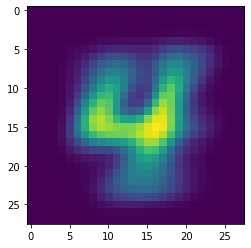

In [11]:
im = o.reshape((28,28))
plt.imshow(im)

In [12]:
import pandas as pd
import numpy as np

d = pd.read_csv('./sample_data/mnist_test.csv', header=None)
d = np.array(d)
y_train = d[:,1:].reshape(-1,28,28)
y_train = y_train/255

In [14]:
import tensorflow.keras as keras
from keras import Sequential
from keras import layers, optimizers

model_gen = Sequential()
model_gen.add(layers.Dense(units=3136, activation='relu'))
model_gen.add(layers.BatchNormalization())
model_gen.add(layers.Reshape((7,7,64)))
model_gen.add(layers.UpSampling2D((2,2)))
model_gen.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_gen.add(layers.BatchNormalization())
model_gen.add(layers.UpSampling2D((2,2)))
model_gen.add(layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model_gen.add(layers.BatchNormalization())
model_gen.add(layers.Conv2D(filters=1, kernel_size=3, padding='same', activation='sigmoid'))
model_gen.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.002), metrics=['accuracy'])

In [16]:
model_disc = Sequential()
model_disc.add(layers.Conv2D(filters=16, kernel_size=3, padding='same', input_shape = (28,28,1), activation='relu'))
model_disc.add(layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model_disc.add(layers.MaxPooling2D(pool_size=(3,3), strides=2))
model_disc.add(layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model_disc.add(layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model_disc.add(layers.MaxPooling2D(pool_size=(3,3),strides=2))
model_disc.add(layers.Flatten())
model_disc.add(layers.Dense(units=1, activation='sigmoid'))
model_disc.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [17]:
model_comb = Sequential()
model_comb.add(model_gen)
model_comb.add(model_disc)
model_disc.trainable = False
model_comb.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
#배치 크기 등 설정
n0rig = 64
nGen = n0rig
vector_size = 10
nEpoch = 2000

#반복
for i in range(nEpoch):
  #이미지 생성
  y_gen = np.zeros((nGen,28,28))
  test_input = np.random.rand(nGen,vector_size)
  for j in range(nGen):
    o = model_gen.predict(test_input[j,:].reshape(1,10))
    o = o.reshape((28,28))
    y_gen[j,:] = o
  y_gen = np.expand_dims(y_gen,-1)

  #원본 이미지 선택
  idx = np.array(range(y_train.shape[0]))
  np.random.shuffle(idx)
  idx = idx[:n0rig]
  y_orig = y_train[idx,:,:]
  y_orig = np.expand_dims(y_orig,-1)

  #원본 이미지 - 생성 이미지 결합
  test_img = np.concatenate((y_gen, y_orig),0)
  test_target = np.concatenate((np.zeros(y_gen.shape[0]), np.ones(y_gen.shape[0])),0)

  #판별자 학습
  loss_disc = model_disc.train_on_batch(test_img, test_target)

  #생성자 학습
  loss_gen = model_comb.train_on_batch(test_input, np.ones(test_input.shape[0]))

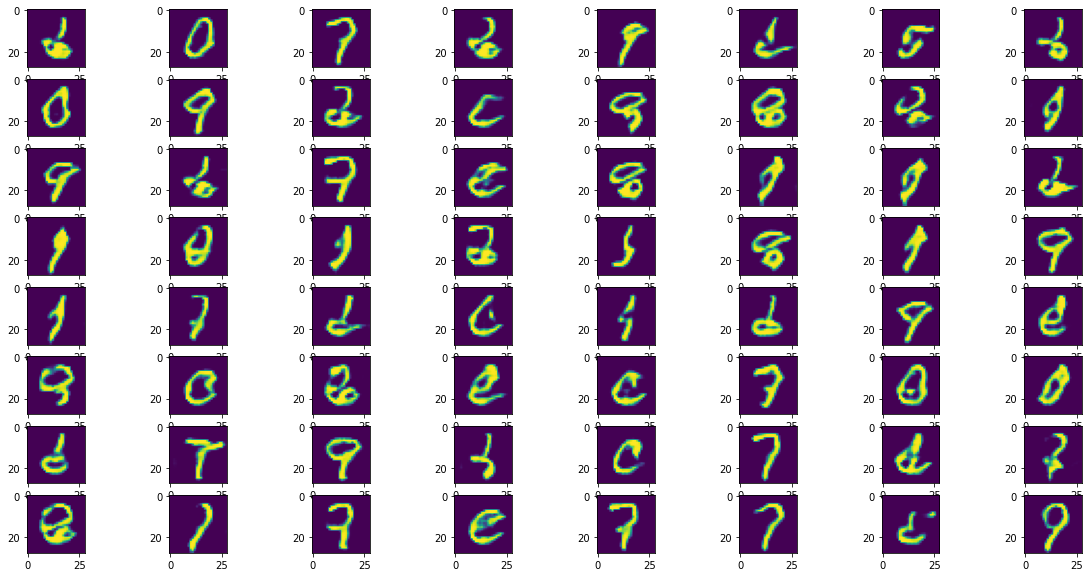

In [21]:
fig = plt.figure(figsize=[20,10])
test_input = np.random.rand(nGen, vector_size)
for i in range(nGen):
  o = model_gen.predict(test_input[i,:].reshape(1,vector_size))
  o = o.reshape((28,28))
  ax = fig.add_subplot(8, 8, i+1)
  ax.imshow(o)